# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from stock_prices_predictions.get_data import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_percentage_error

# Fetch data

define company:

In [2]:
company = "NVDA"
days_ahead = 1

In [3]:
X_train, X_test = get_lstm_data(company)

In [4]:
X_train.shape

(3773, 1)

In [5]:
X_test.shape

(919, 1)

# Scale data

In [6]:
#try differente scalers
scaler = RobustScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [7]:
X_train_sc.shape

(3773, 1)

In [8]:
X_test_sc.shape

(919, 1)

# Create Sequences

In [9]:
#X_train, y_train = create_sequences(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
#X_test, y_test = create_sequences(pd.DataFrame(X_test_sc),pd.DataFrame(X_test), days_ahead)

In [10]:
#X_train, y_train = create_sequences_scaled(pd.DataFrame(X_train_sc), days_ahead)
#X_test, y_test = create_sequences_scaled(pd.DataFrame(X_test_sc), days_ahead)

In [11]:
X_train, y_train, y_train_simple = create_sequences_scaled_plus(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
X_test, y_test, y_test_simple = create_sequences_scaled_plus(pd.DataFrame(X_test_sc), pd.DataFrame(X_test), days_ahead)

In [12]:
X_train.shape

(919, 19, 1)

In [13]:
X_test.shape

(205, 19, 1)

In [14]:
y_train.shape

(919,)

In [15]:
y_test.shape

(205,)

In [16]:
y_test_simple

array([ 19.17476463,  19.54313469,  20.30896378,  21.69520569,
        21.48193932,  21.46734047,  22.24584961,  22.26531219,
        22.62537003,  22.0998764 ,  20.80561066,  20.49420738,
        21.92471313,  22.02202415,  21.46734047,  21.60358047,
        22.13880539,  21.88578987,  20.38716316,  20.56854439,
        20.26549149,  21.87851715,  21.76120377,  21.21376038,
        21.09644318,  20.74451065,  19.66916084,  19.71804047,
        19.30745316,  19.7375927 ,  18.97507095,  19.28789902,
        19.83535194,  22.46507454,  22.99297523,  22.56893158,
        19.90856361,  22.06827354,  21.3516407 ,  22.2351532 ,
        22.88306618,  22.57874298,  23.27573967,  24.95442009,
        25.59251595,  26.92760658,  26.90797234,  27.91910934,
        28.17434883,  30.9721508 ,  29.84320831,  30.57734489,
        30.71530151,  32.27225113,  32.62700272,  32.01605225,
        32.1934166 ,  32.57772446,  32.90291595,  31.07005119,
        29.73974228,  26.93131828,  28.00541687,  28.86

In [17]:
len(y_test_simple)

205

In [18]:
X_train

array([[[-1.0277746 ],
        [-1.0395138 ],
        [-1.0536009 ],
        ...,
        [-1.085884  ],
        [-1.1058408 ],
        [-1.1164061 ]],

       [[-1.0741447 ],
        [-1.0612315 ],
        [-1.0776665 ],
        ...,
        [-1.1111234 ],
        [-1.101145  ],
        [-1.0952755 ]],

       [[-1.0717968 ],
        [-1.0547749 ],
        [-1.0371659 ],
        ...,
        [-1.1099496 ],
        [-1.0929276 ],
        [-1.0835361 ]],

       ...,

       [[ 0.61217344],
        [ 0.6472617 ],
        [ 0.5794241 ],
        ...,
        [ 0.7940669 ],
        [ 0.77292097],
        [ 0.77409554]],

       [[ 0.5969681 ],
        [ 0.59813803],
        [ 0.59579796],
        ...,
        [ 0.81756306],
        [ 0.7917175 ],
        [ 0.81051385]],

       [[ 0.75486743],
        [ 0.7431707 ],
        [ 0.7431707 ],
        ...,
        [ 0.82343674],
        [ 0.8445831 ],
        [ 0.88570106]]], dtype=float32)

# Create model

In [19]:
model = Sequential()
#model.add(LSTM(units=72, activation='relu', input_shape= (36, 4), return_sequences=True))
model.add(LSTM(units=36, activation='tanh', input_shape= (19, 1)))
#model.add(Dense(units=36, activation="tanh"))
#model.add(Dense(units=10, activation="tanh"))
model.add(Dense(units=1, activation="linear"))

# Fit model


In [20]:
es = EarlyStopping(patience=20, restore_best_weights=True)

#try different losses: mae, mape, mse

#rmsprop optimizer
model.compile(optimizer="nadam", loss="mse", metrics=["mae", "mape"])
#validation_split=0.2,
history_LSTM = model.fit(X_train, y_train, epochs=200, batch_size=16, workers=-1, validation_split=0.2, callbacks=[es])

Epoch 1/200
46/46 [==============================] - 3s 25ms/step - loss: 0.3553 - mae: 0.3962 - mape: 93.8137 - val_loss: 0.0105 - val_mae: 0.0808 - val_mape: 163.1580
Epoch 2/200
46/46 [==============================] - 1s 14ms/step - loss: 0.0396 - mae: 0.1422 - mape: 100.1024 - val_loss: 0.0057 - val_mae: 0.0590 - val_mape: 162.6740
Epoch 3/200
46/46 [==============================] - 1s 16ms/step - loss: 0.0239 - mae: 0.1145 - mape: 85.4021 - val_loss: 0.0035 - val_mae: 0.0460 - val_mape: 118.8110
Epoch 4/200
46/46 [==============================] - 1s 16ms/step - loss: 0.0183 - mae: 0.0996 - mape: 71.2021 - val_loss: 0.0031 - val_mae: 0.0431 - val_mape: 100.9791
Epoch 5/200
46/46 [==============================] - 1s 17ms/step - loss: 0.0160 - mae: 0.0931 - mape: 66.9564 - val_loss: 0.0030 - val_mae: 0.0429 - val_mape: 92.9097
Epoch 6/200
46/46 [==============================] - 1s 17ms/step - loss: 0.0147 - mae: 0.0889 - mape: 63.3471 - val_loss: 0.0029 - val_mae: 0.0431 - val_m

46/46 [==============================] - 1s 16ms/step - loss: 0.0044 - mae: 0.0473 - mape: 32.8048 - val_loss: 0.0016 - val_mae: 0.0306 - val_mape: 63.5520
Epoch 50/200
46/46 [==============================] - 1s 15ms/step - loss: 0.0044 - mae: 0.0474 - mape: 32.1383 - val_loss: 0.0023 - val_mae: 0.0396 - val_mape: 84.6720
Epoch 51/200
46/46 [==============================] - 1s 16ms/step - loss: 0.0044 - mae: 0.0479 - mape: 33.8142 - val_loss: 9.9048e-04 - val_mae: 0.0228 - val_mape: 48.6723
Epoch 52/200
46/46 [==============================] - 1s 17ms/step - loss: 0.0046 - mae: 0.0490 - mape: 33.6091 - val_loss: 0.0012 - val_mae: 0.0264 - val_mape: 49.5158
Epoch 53/200
46/46 [==============================] - 1s 18ms/step - loss: 0.0043 - mae: 0.0470 - mape: 32.9497 - val_loss: 0.0018 - val_mae: 0.0339 - val_mape: 62.8083
Epoch 54/200
46/46 [==============================] - 1s 17ms/step - loss: 0.0043 - mae: 0.0469 - mape: 32.8054 - val_loss: 0.0014 - val_mae: 0.0304 - val_mape: 54.

In [21]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 115.2306 - mae: 6.5372 - mape: 36.2890


[115.23062896728516, 6.537248611450195, 36.288970947265625]

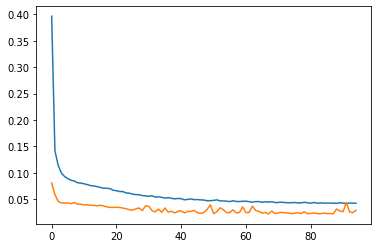

In [22]:
plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

# Test Model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36)                5472      
_________________________________________________________________
dense (Dense)                (None, 1)                 37        
Total params: 5,509
Trainable params: 5,509
Non-trainable params: 0
_________________________________________________________________


In [24]:
prediction = model.predict(X_test)

In [25]:
prediction

array([[0.85926044],
       [0.917538  ],
       [1.0006666 ],
       [1.1836684 ],
       [1.1591377 ],
       [1.1573712 ],
       [1.2416357 ],
       [1.2543378 ],
       [1.2911232 ],
       [1.247059  ],
       [1.0629382 ],
       [1.032524  ],
       [1.2008557 ],
       [1.216548  ],
       [1.1547929 ],
       [1.168355  ],
       [1.2260728 ],
       [1.1972708 ],
       [1.0170187 ],
       [1.0460705 ],
       [1.0072641 ],
       [1.2012386 ],
       [1.1859051 ],
       [1.1187898 ],
       [1.1033162 ],
       [1.075498  ],
       [0.9435271 ],
       [0.9434847 ],
       [0.8795682 ],
       [0.932467  ],
       [0.85241675],
       [0.8769444 ],
       [0.94729453],
       [1.2273843 ],
       [1.346088  ],
       [1.2925501 ],
       [0.97026545],
       [1.2356738 ],
       [1.1490719 ],
       [1.24708   ],
       [1.3245355 ],
       [1.2902465 ],
       [1.3700734 ],
       [1.5681665 ],
       [1.6620818 ],
       [1.8185496 ],
       [1.8310348 ],
       [1.946

# Visualizing Model

In [26]:
y_test_back = scaler.inverse_transform(y_test.reshape(-1, 1))
prediction_back = scaler.inverse_transform(prediction.reshape(-1, 1))

In [ ]:
plt.plot(X_graph.iloc[:18,0])
#plt.scatter(range(len(y_test_back)), y_test_back,  color="black", label=f"Actual {company} Price")
#plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")

In [ ]:
plt.scatter(range(len(y_test_back)), y_test_simple,  color="black", label=f"Actual {company} Price")
plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

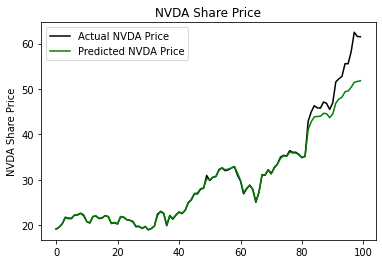

In [33]:
plt.plot(y_test_simple[:100],  color="black", label=f"Actual {company} Price")
plt.plot(prediction_back[:100], color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [29]:
mape = mean_absolute_percentage_error(y_test_back, prediction_back)
np.mean(mape)

32.543056

In [ ]:
mape2 = mean_absolute_percentage_error(y_test_back, y_test_simple)
np.mean(mape2)